# NACHOS12.L75-scal

__creation__ : 09/05/2017

__purpose__ : same as [NACHOS12.L75-MAA05](2017-05-09-AA-NACHOS12.L75-MAA05.html) with several cutting in processors in order to determine the best fit

__outcome__ : optimal choice : 1555 procs 62x48 on HSW24, 29 procs for xios : 269 step/min after 4mn

## We want to find the most efficient number of processors for NACHOS12

  - on meolkerg :
    - in /fsnet/data/meom/workdir/albert6a/NATL12/MPP_PREP, mpp_optimize has already been run and produced the processor.layout file
    - we want to test NACHOS to run with 500 to 2000 processors, this [script](find_best_procs.ksh) help us select the best cutting, results in [here](best.txt)
  - locally :
    - we use this [calc file](nb_procs_scalabilite.ods) to determine the number of procs remaining for xios
    
  - on occigen :
    - includefile.ksh, namelist and NACHOS12.L75-scal_occigen.ksh have been adapted to a multiple launch : 

## Results 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

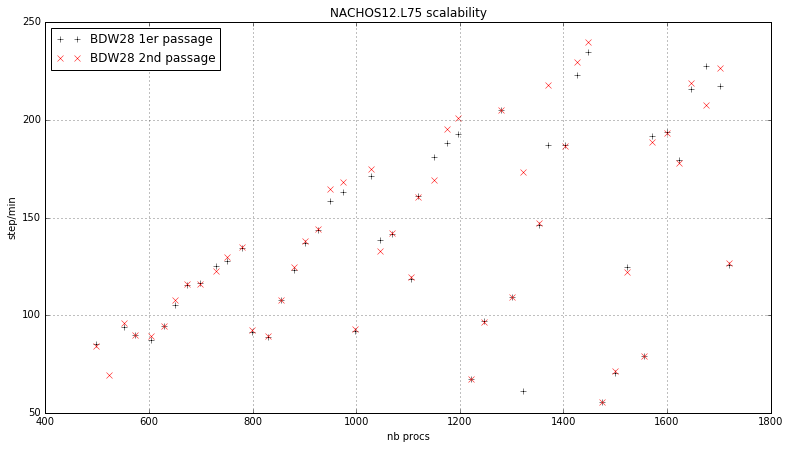

In [2]:
results=np.loadtxt('results.txt')
results2=np.loadtxt('results2.txt')
x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.legend(['BDW28 1er passage','BDW28 2nd passage'],loc=2)
plt.grid()
plt.title('NACHOS12.L75 scalability')
plt.savefig('/media/extra/DATA/NACHOS12/PLOTS/scalability.png')

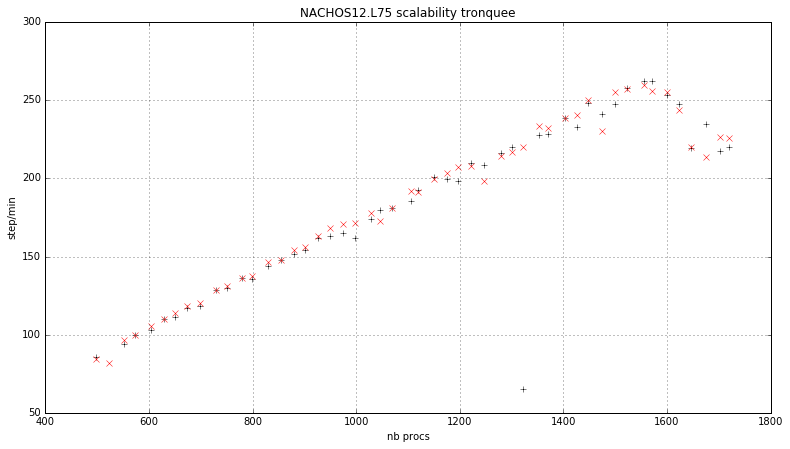

In [3]:
results=np.loadtxt('results_tronc1.txt')
results2=np.loadtxt('results_tronc2.txt')

x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.grid()
plt.title('NACHOS12.L75 scalability tronquee')
plt.savefig('scalability_tronc.png')

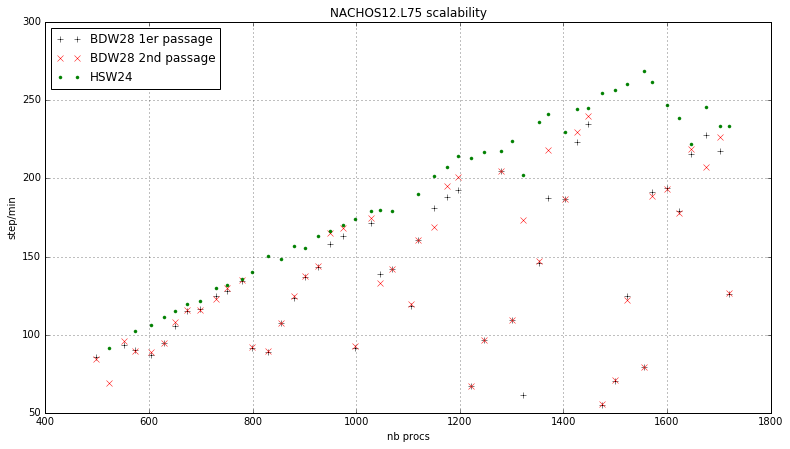

In [4]:
results=np.loadtxt('results.txt')
results2=np.loadtxt('results2.txt')
results24=np.loadtxt('results_24.txt')
x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x24=results24[:,0]
y24=results24[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x24,y24,'g.')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.legend(['BDW28 1er passage','BDW28 2nd passage','HSW24'],loc=2)
plt.grid()
plt.title('NACHOS12.L75 scalability')
plt.savefig('scalability_24-28.png')

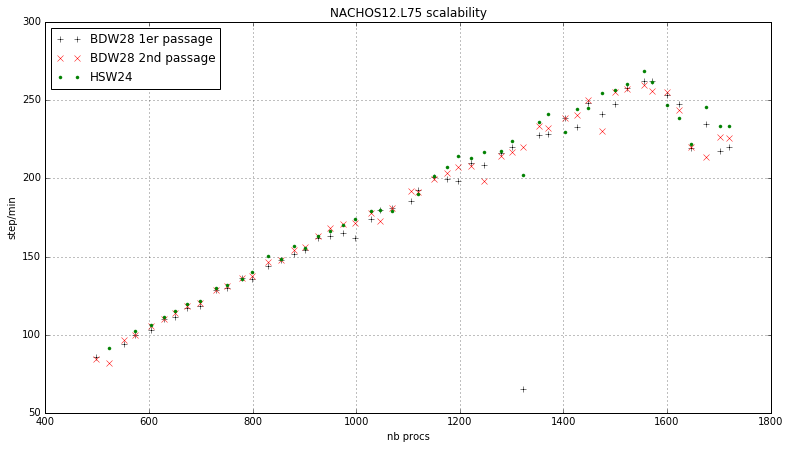

In [5]:
results=np.loadtxt('results_tronc1.txt')
results2=np.loadtxt('results_tronc2.txt')
results24=np.loadtxt('results_24.txt')
x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x24=results24[:,0]
y24=results24[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x24,y24,'g.')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.legend(['BDW28 1er passage','BDW28 2nd passage','HSW24'],loc=2)
plt.grid()
plt.title('NACHOS12.L75 scalability')
plt.savefig('scalability_24-28tronc.png')

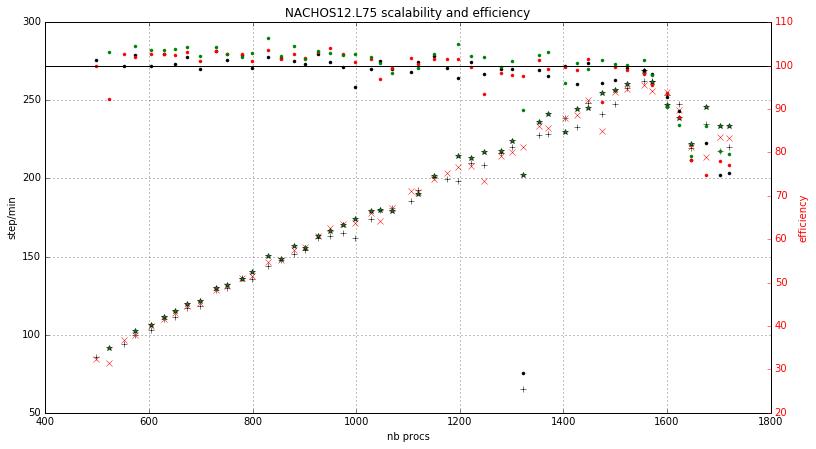

In [30]:
results=np.loadtxt('results_tronc1.txt')
results2=np.loadtxt('results_tronc2.txt')
results24=np.loadtxt('results_tronc_24.txt')

x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]
x24=results24[:,0]
y24=results24[:,1]


fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.plot(x24,y24,'g*')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.grid()

ax2 = ax.twinx()
yeff=0*y
yeff2=0*y2
yeff24=0*y24

for i in np.arange(0,len(x2)):
    yeff2[i]=y2[i]*100/(x2[i]*102.8/603)
for i in np.arange(0,len(x)):
    yeff[i]=y[i]*100/(x[i]*102.8/603)
for i in np.arange(0,len(x24)):
    yeff24[i]=y24[i]*100/(x24[i]*102.8/603)
   
ax2.plot(x,yeff,'k.')
ax2.plot(x2,yeff2,'r.')
ax2.plot(x24,yeff24,'g.')
ax2.axhline(y=100,color='k')

ax2.set_ylabel('efficiency', color='r')
ax2.tick_params('y', colors='r')

plt.title('NACHOS12.L75 scalability and efficiency')
plt.savefig('scalability_efficiency_tronc_24-28.png')




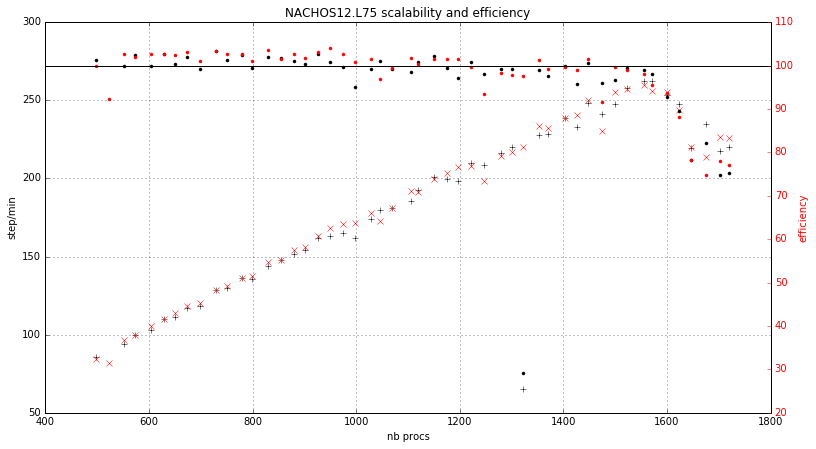

In [31]:
results=np.loadtxt('results_tronc1.txt')
results2=np.loadtxt('results_tronc2.txt')

x=results[:,0]
y=results[:,1]
x2=results2[:,0]
y2=results2[:,1]

fig=plt.figure(figsize=(13,7))
ax=fig.gca()
plt.plot(x,y,'k+')
plt.plot(x2,y2,'rx')
plt.xlabel('nb procs')
plt.ylabel('step/min')
plt.grid()

ax2 = ax.twinx()
yeff=0*y
yeff2=0*y2
for i in np.arange(0,len(x2)):
    yeff2[i]=y2[i]*100/(x2[i]*102.8/603)
for i in np.arange(0,len(x)):
    yeff[i]=y[i]*100/(x[i]*102.8/603)
   
ax2.plot(x,yeff,'k.')
ax2.plot(x2,yeff2,'r.')
ax2.axhline(y=100,color='k')

ax2.set_ylabel('efficiency', color='r')
ax2.tick_params('y', colors='r')

plt.title('NACHOS12.L75 scalability and efficiency')
plt.savefig('scalability_efficiency_tronc.png')
